## Analysis of Adult Data Anthropometric Data
Source: https://www.scribd.com/doc/124837000/Adult-Data-Handbook?doc_id=124837000&download=true&order=661425273

In [ ]:
from tools_old import calc_joint_positions, plot_skeleton, generate_samples, calculate_distances, calc_angles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import norm
from PIL import Image

### Reading Adult Data Dataset

In [25]:
df = pd.read_csv('adultdata_data.csv')
df.head()

,Dimension,Man5,Man50,Man95,Woman5,Woman50,Woman95
0,FootLength,198.0,211.3,224.5,177.6,190.8,204.1
1,LowerLeg,377.1,417.2,457.3,336.8,373.5,410.1
2,ThighLength,444.9,504.6,564.3,400.4,456.7,513.1
3,TorsoHeight,421.6,447.9,474.1,389.2,413.8,438.3
4,UpperArm,346.6,376.7,406.7,312.5,341.5,370.6


In [26]:
data = df.set_index('Dimension').transpose()

data

Dimension,FootLength,LowerLeg,ThighLength,TorsoHeight,UpperArm,Forearm
Man5,198.0,377.1,444.9,421.6,346.6,332.7
Man50,211.3,417.2,504.6,447.9,376.7,365.5
Man95,224.5,457.3,564.3,474.1,406.7,398.4
Woman5,177.6,336.8,400.4,389.2,312.5,291.4
Woman50,190.8,373.5,456.7,413.8,341.5,325.5
Woman95,204.1,410.1,513.1,438.3,370.6,359.7


### Visualsing 2D Human Skeleton + Calculating Dimensions A, B, C & D

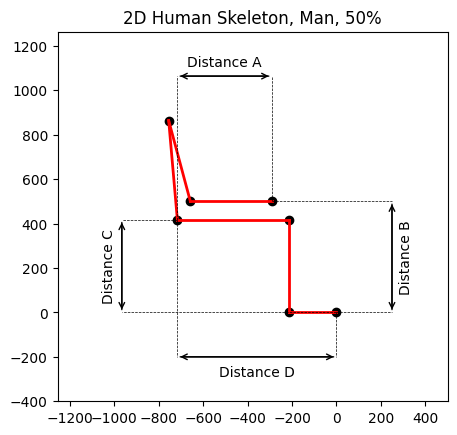

A (Horizontal distance):  423.96 mm
B (Vertical distance):  499.53 mm
C (Vertical distance):  417.20 mm
D (Horizontal distance):  715.90 mm


In [27]:
# Input gender, percentile and back inclination angle
gender = 'Man'
percentile = '50'
back_inclination = 95           # Angle of back relative to x-axis (FIXED)

# Input arbitrary joint angles
angle_1 = 90                    # Ankle Flexion
angle_2 = 90                    # Knee Flexion
angle_4 = 10                    # Shoulder Flexion 
angles_in = [angle_1, angle_2, back_inclination, angle_4]

# Calculate and plot joints
joints = calc_joint_positions(data, gender, percentile, angles_in)
plot_skeleton(joints, dists = True, gender=gender, percentile=percentile, overlay=False)

# Calculate the required distances
distance_A, distance_B, distance_C, distance_D = calculate_distances(joints)

# Output the distances
print(f"A (Horizontal distance): {distance_A: .2f} mm")
print(f"B (Vertical distance): {distance_B: .2f} mm")
print(f"C (Vertical distance): {distance_C: .2f} mm")
print(f"D (Horizontal distance): {distance_D: .2f} mm")

### Joint Angle Variations

In [28]:
# Define the ranges for angles 1, 2, and 3
range_1 = np.arange(80,121,1)  
range_2 = np.arange(80,121,1)
range_4 = np.arange(0,31,1)  

# Create an empty 3D array to store the results (using lists of lists of lists)
A = np.full((len(range_1), len(range_2), len(range_4)), None)
B = np.full((len(range_1), len(range_2), len(range_4)), None)
C = np.full((len(range_1), len(range_2), len(range_4)), None)
D = np.full((len(range_1), len(range_2), len(range_4)), None)

# Nested loops over the angles 1, 2, and 3
for i, a in enumerate(range_1):
    for j, b in enumerate(range_2):
        for k, d in enumerate(range_4):
            angles_in = [a, b, back_inclination, d]

            # Calculate and plot joints
            joints = calc_joint_positions(data, gender, percentile, angles_in)

            # Calculate the required distances
            distance_A, distance_B, distance_C, distance_D = calculate_distances(joints)

            # Store the result in the corresponding location in the 3D array
            A[i, j, k] = distance_A
            B[i, j, k] = distance_B
            C[i, j, k] = distance_C
            D[i, j, k] = distance_D

In [29]:
# MINIMUM A:
min_A_index = np.unravel_index(np.argmin(A), A.shape)
min_A_value = A[min_A_index]

min_A_1 = range_1[min_A_index[0]]
min_A_2 = range_2[min_A_index[1]]
min_A_3 = range_4[min_A_index[2]]

# MAXIMUM A:
max_A_index = np.unravel_index(np.argmax(A), A.shape)
max_A_value = A[max_A_index]

max_A_1 = range_1[max_A_index[0]]
max_A_2 = range_2[max_A_index[1]]
max_A_3 = range_4[max_A_index[2]]

# MINIMUM B:
min_B_index = np.unravel_index(np.argmin(B), B.shape)
min_B_value = B[min_B_index]

min_B_1 = range_1[min_B_index[0]]
min_B_2 = range_2[min_B_index[1]]
min_B_3 = range_4[min_B_index[2]]

# MAXIMUM B:
max_B_index = np.unravel_index(np.argmax(B), B.shape)
max_B_value = B[max_B_index]

max_B_1 = range_1[max_B_index[0]]
max_B_2 = range_2[max_B_index[1]]
max_B_3 = range_4[max_B_index[2]]

# MINIMUM C:
min_C_index = np.unravel_index(np.argmin(C), C.shape)
min_C_value = C[min_C_index]

min_C_1 = range_1[min_C_index[0]]
min_C_2 = range_2[min_C_index[1]]
min_C_3 = range_4[min_C_index[2]]

# MAXIMUM C:
max_C_index = np.unravel_index(np.argmax(C), C.shape)
max_C_value = C[max_C_index]

max_C_1 = range_1[max_C_index[0]]
max_C_2 = range_2[max_C_index[1]]
max_C_3 = range_4[max_C_index[2]]

# MINIMUM D:
min_D_index = np.unravel_index(np.argmin(D), D.shape)
min_D_value = D[min_D_index]

min_D_1 = range_1[min_D_index[0]]
min_D_2 = range_2[min_D_index[1]]
min_D_3 = range_4[min_D_index[2]]

# MAXIMUM D:
max_D_index = np.unravel_index(np.argmax(D), D.shape)
max_D_value = D[max_D_index]

max_D_1 = range_1[max_D_index[0]]
max_D_2 = range_2[max_D_index[1]]
max_D_3 = range_4[max_D_index[2]]

### Calculating Minimum / Maximum Dimensions (A, B, C or D):

Minimum B value: 107.88423311517238


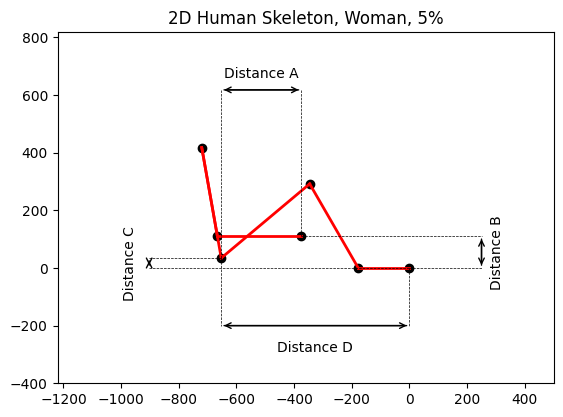

In [30]:
# Input gender, percentile and back inclination angle
gender = 'Woman'
percentile = '5'
back_inclination = 100      # Angle of back relative to x-axis (FIXED)

# Chosen Dimension and max / min
dimension = 'B'
min_or_max = 'min'

value = globals()[f"{min_or_max}_{dimension}_value"]        
angle_1 = globals()[f"{min_or_max}_{dimension}_1"]
angle_2 = globals()[f"{min_or_max}_{dimension}_2"] 
angle_4 = globals()[f"{min_or_max}_{dimension}_3"] 

# Print the minimum value dynamically
if min_or_max == 'min':
    Minimum_or_Maximum = 'Minimum'
    print(f"{Minimum_or_Maximum} {dimension} value: {value}")

else:
    Minimum_or_Maximum = 'Maximum'
    print(f"{Minimum_or_Maximum} {dimension} value: {value}")

angles_in = [angle_1, angle_2, back_inclination, angle_4]

# Calculate and plot joints
joints = calc_joint_positions(data, gender, percentile, angles_in)
plot_skeleton(joints, dists = True, gender=gender, percentile=percentile, overlay=False)

### Sample Generation for PCA

447.9
7.9635258358662755


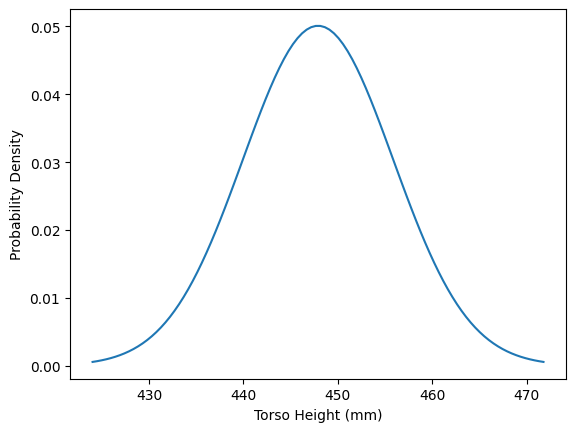

In [ ]:
mu = data['TorsoHeight']['Man50']
# sigma = (data['TorsoHeight']['Man95'] - data['TorsoHeight']['Man50']) / (2 * norm.ppf(0.95))
sigma = (data['TorsoHeight']['Man95'] - data['TorsoHeight']['Man50']) / 3.29

print(mu)
print(sigma)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y =  stats.norm.pdf(x, mu, sigma)

plt.plot(x,y)

plt.xlabel('Torso Height (mm)')
plt.ylabel('Probability Density')
plt.show()

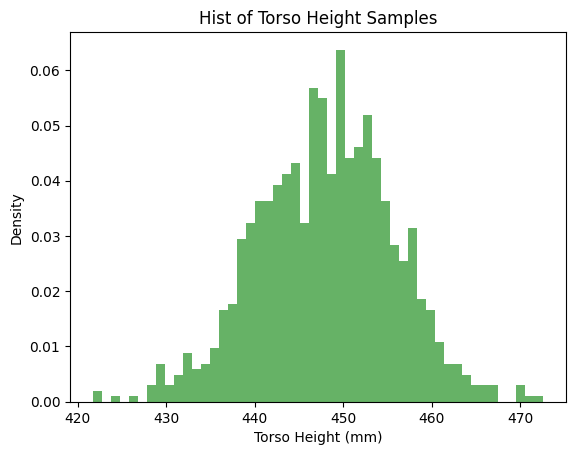

In [ ]:
torso = np.random.normal(mu, sigma, 1000)

plt.hist(torso, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Torso Height (mm)')
plt.ylabel('Density')
plt.title('Hist of Torso Height Samples')
plt.show()

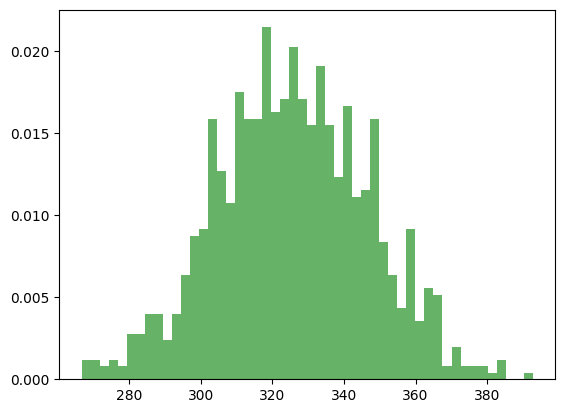

In [ ]:
womantorso = generate_samples(data, 'Forearm', 'Woman')
plt.hist(womantorso, bins=50, density=True, alpha=0.6, color='g')
plt.show()